# MCMC Model Diagnostics

In this section, we want to demonstrate how to use the plotting utilities to visualize the posterior samples of Orbit MCMC models. Those could be very useful in practice when checking the convergence of MCMC.

In [1]:
import pandas as pd
import numpy as np
from orbit.models.dlt import DLTMAP, DLTAggregated, DLTFull
from orbit.diagnostics.plot import plot_posterior_params
from orbit.utils.dataset import load_iclaims

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

## Data - Initial Claim

First, let's load the example data set. Here we used initial claims data from U.S. Employment and Training Administration. An initial claim is a claim filed by an unemployed individual after a separation from an employer. The claim requests a determination of basic eligibility for the Unemployment Insurance program. 

The dataset has 5 colums: 'week', 'claims', 'trend.unemploy', 'trend.filling' and 'trend.job'.

U.S. Employment and Training Administration, Initial Claims [ICNSA], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/ICNSA, January 3, 2021.

In [2]:
df = load_iclaims()
df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']] = \
    np.log(df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']])

In [3]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job
0,2010-01-03,13.386595,0.168876,-0.328309,0.113033
1,2010-01-10,13.624218,0.168876,-0.204695,0.164326
2,2010-01-17,13.398741,0.185136,-0.302334,0.113033
3,2010-01-24,13.137549,0.152346,-0.204695,0.102451
4,2010-01-31,13.196760,0.083354,-0.252323,0.070016


array([<matplotlib.axes._subplots.AxesSubplot object at 0x135b79ef0>,
      dtype=object)

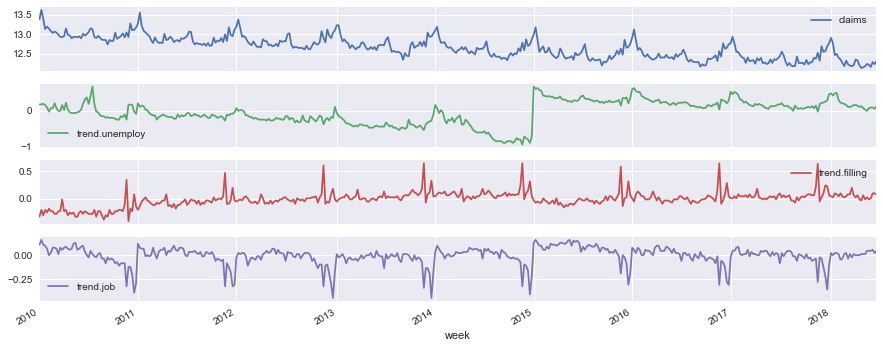

In [4]:
df_tmp = df.copy()
df_tmp.set_index('week', inplace = True) 
df_tmp.plot(subplots=True, figsize=(15,6))

Spliting the data into train and test. We use the first 52 weeks as train df. 

In [5]:
test_size=52
train_df=df[:-test_size]
test_df=df[-test_size:]

## Fit a Model

In [6]:
DATE_COL="week"
RESPONSE_COL="claims"
REGRESSOR_COL=['trend.unemploy', 'trend.filling', 'trend.job']

In [7]:
dlt_mcmc = DLTFull(
    response_col=RESPONSE_COL,
    date_col=DATE_COL,
    regressor_col=REGRESSOR_COL,
    regressor_sign=["+", '+', '='], 
    seasonality=52,
)

## Posterior Diagnostic Viz

In [8]:
dlt_mcmc.fit(df=train_df)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4ee480de54261177d10b47d0d1ba4286 NOW.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


odict_keys(['l', 'b', 'lev_sm', 'slp_sm', 'obs_sigma', 'nu', 'lt_sum', 's', 'sea_sm', 'beta', 'gt_sum', 'gb', 'gl', 'lp__'])


### density/histogram

If you see certain warning message related to `scipy`, which can be resolved by upgrading to `scipy>=1.2` for python >= 3.6.

You can specify a path string (e.g., './density.png') to save the chart.

In [9]:
dlt_mcmc._num_of_positive_regressors

2

In [10]:
dlt_mcmc._posterior_samples.keys()

odict_keys(['l', 'b', 'lev_sm', 'slp_sm', 'obs_sigma', 'nu', 'lt_sum', 's', 'sea_sm', 'beta', 'gt_sum', 'gb', 'gl', 'lp__'])

In [16]:
dlt_mcmc._posterior_samples['beta'][:,3]

IndexError: index 3 is out of bounds for axis 1 with size 3

In [11]:
_ = plot_posterior_params(dlt_mcmc, kind='density', 
                          incl_trend_params=True, incl_smooth_params=True)

KeyError: 'pr_beta'

### trace

Currently, trace plot may not represent the actual sample process for different chainse since this information is not stored in orbit model objects.

In [ ]:
_ = plot_posterior_params(lgt_mcmc, kind='trace', 
                          incl_trend_params=True, incl_smooth_params=True)

### pair plot

In [ ]:
_ = plot_posterior_params(lgt_mcmc, kind='pair', pair_type='scatter', 
                          incl_trend_params=False, incl_smooth_params=False)

In [ ]:
_ = plot_posterior_params(lgt_mcmc, kind='pair', pair_type='reg', 
                          incl_trend_params=False, incl_smooth_params=False)